Sources used to create:
# https://arxiv.org/pdf/2010.11929.pdf
https://www.learnpytorch.io/08_pytorch_paper_replicating/

In [10]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torchinfo import summary


import matplotlib.pyplot as plt

from GoingModular import data_setup,engine
from helper_functions import download_data,set_seeds,plot_loss_curves

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination=r"pizza_steak_sushi")
train_dir = image_path / "train"
test_dir = image_path / "test"

[INFO] ..\data\pizza_steak_sushi directory exists, skipping download.


In Table 3, the training resolution is mentioned as being 224 (height=224, width=224).

shape of img torch.Size([3, 224, 224])


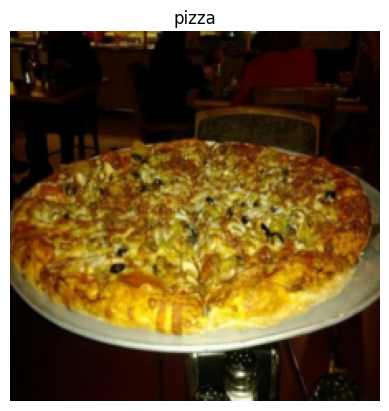

In [15]:
IMG_SIZE = 224
manual_transform=transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor()
])
train_dataloader,test_dataloader,class_names=data_setup.create_dataloaders(train_dir=train_dir,test_dir=test_dir,transform=manual_transform,batch_size=4096)

image_batch, label_batch = next(iter(test_dataloader))
img,label=image_batch[0],label_batch[0]
print(f"shape of img {img.shape}")

plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)
plt.show()
